<a href="https://colab.research.google.com/github/SuperDuck1892/A.I_HomeWork/blob/main/HomeWork_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
(x_train,y_train),(x_test,y_test)=cifar100.load_data()
print(x_train.shape)
print(y_train.shape)
     

(50000, 32, 32, 3)
(50000, 1)


In [2]:
print(x_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000, 1)


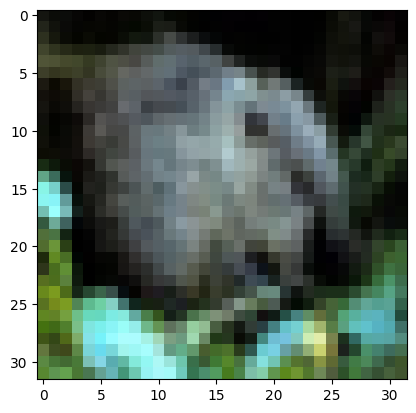

so hinh la: [4]


In [3]:
digit=x_train[1892]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show()
print('so hinh la:',y_train[1892])

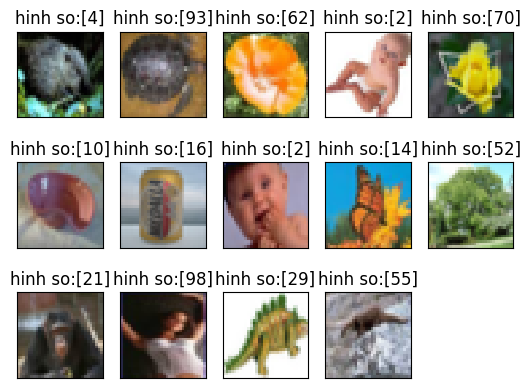

In [4]:

for i in range(14):
   plt.subplot(3,5,i+1)
   plt.tight_layout
   plt.imshow(x_train[i+1892],cmap='gray',interpolation='none')
   plt.title( 'hinh so:{}'.format(y_train[i+1892]))
   plt.xticks([])
   plt.yticks([])

In [5]:
from keras.models import Sequential #Senquential  mo ta ANN theo tuan tu cac lop #ke tiep lien tuc nhau
from keras.layers import Dense      #Dense=full_connected( su ket noi daydu)  
model = Sequential()    
model.add(Dense(512,activation='relu',input_shape=(32*32*3,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
Total params: 1,897,432
Trainable params: 1,897,432
Non-trainable params: 0
_________________________________________________________________


In [6]:

x_train = x_train.reshape((50000,32*32*3))  #chỉnh lại kích thước số dữ liệu đầu vào 
x_train = x_train.astype('float32')/255   #chuyển qua float để có thể chia được (dữ liệu từ 0->1)

x_test = x_test.reshape((10000,32*32*3))  
x_test = x_test.astype('float32')/255

print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [7]:

from keras.utils import to_categorical    #to_categorical: chuyển từ 1 bit thành nhiều bit đầu ra 
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

print(y_train.shape)
print(y_test.shape)

(50000, 100)
(10000, 100)


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import cifar10
from keras.utils import to_categorical
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',  #Đánh giá sự mất mát (loss)
              metrics=['accuracy']) #Đo lường độ chính xác (metrics)
model.fit(x_train,y_train,epochs=10,batch_size=128)   #20 lần học, mỗi lần học 128 lần ngẫu nhiên
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Độ mất mát: ',test_loss)
print('Độ chính xác: ',test_acc)

Epoch 1/10
391/391 [==============================] - 28s 70ms/step - loss: 4.2620 - accuracy: 0.0548
Epoch 2/10
391/391 [==============================] - 18s 47ms/step - loss: 3.8521 - accuracy: 0.1088
Epoch 3/10
391/391 [==============================] - 15s 39ms/step - loss: 3.6694 - accuracy: 0.1387
Epoch 4/10
391/391 [==============================] - 15s 39ms/step - loss: 3.5359 - accuracy: 0.1633
Epoch 5/10
391/391 [==============================] - 15s 39ms/step - loss: 3.4394 - accuracy: 0.1818
Epoch 6/10
391/391 [==============================] - 15s 39ms/step - loss: 3.3523 - accuracy: 0.1965
Epoch 7/10
391/391 [==============================] - 18s 45ms/step - loss: 3.2846 - accuracy: 0.2088
Epoch 8/10
391/391 [==============================] - 15s 39ms/step - loss: 3.2147 - accuracy: 0.2227
Epoch 9/10
391/391 [==============================] - 15s 39ms/step - loss: 3.1551 - accuracy: 0.2288
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 3.3855 

In [9]:
model.save('test.h5')

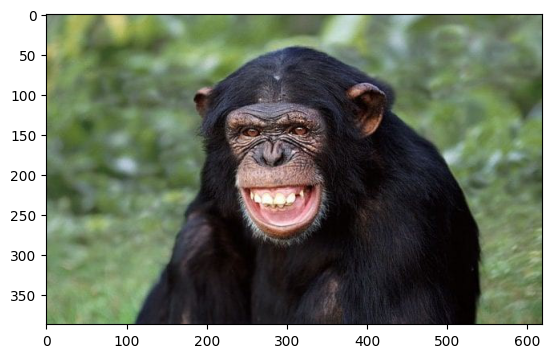

1/1 [==============================] - 0s 31ms/step


array([21])

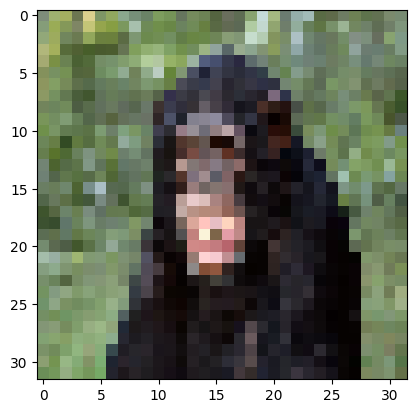

In [11]:
img = plt.imread("tinh tinh.jpg")
plt.imshow(img)
plt.show()
from keras.utils import load_img, img_to_array
img = load_img("tinh tinh.jpg", target_size=(32,32))
plt.imshow(img)
import numpy as np
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = -1)